- 파일 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib 한글깨짐 지원
from matplotlib import font_manager, rc

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)  

In [3]:
df = pd.read_csv('data/서울시 가구형태별 가구 및 가구원 (동별) 통계.csv'); df

,자치구,동,총가구,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
0,자치구,동,계,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상 가구
1,합계,합계,3982290,1390701,1033901,792690,602791,130122,25770,6315
2,종로구,소계,63414,25983,16281,10882,7679,2027,440,122
3,종로구,사직동,3839,1487,1073,701,432,112,28,6
4,종로구,삼청동,1031,380,295,189,112,39,11,5
...,...,...,...,...,...,...,...,...,...,...
447,강동구,둔촌1동,13,6,X,X,X,X,X,X
448,강동구,둔촌2동,9940,2389,2763,2407,1924,380,61,16
449,강동구,암사1동,14431,4551,4008,3064,2229,464,89,26
450,강동구,천호2동,15701,6378,4433,2689,1710,380,84,27


- 전처리

In [4]:
#첫번째 행 정리 

df = df.drop(index=0, axis=0); df

,자치구,동,총가구,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
1,합계,합계,3982290,1390701,1033901,792690,602791,130122,25770,6315
2,종로구,소계,63414,25983,16281,10882,7679,2027,440,122
3,종로구,사직동,3839,1487,1073,701,432,112,28,6
4,종로구,삼청동,1031,380,295,189,112,39,11,5
5,종로구,부암동,3773,1129,1089,772,552,176,39,16
...,...,...,...,...,...,...,...,...,...,...
447,강동구,둔촌1동,13,6,X,X,X,X,X,X
448,강동구,둔촌2동,9940,2389,2763,2407,1924,380,61,16
449,강동구,암사1동,14431,4551,4008,3064,2229,464,89,26
450,강동구,천호2동,15701,6378,4433,2689,1710,380,84,27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 1 to 451
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     451 non-null    object
 1   동       451 non-null    object
 2   총가구     451 non-null    object
 3   1인가구    451 non-null    object
 4   2인가구    451 non-null    object
 5   3인가구    451 non-null    object
 6   4인가구    451 non-null    object
 7   5인가구    451 non-null    object
 8   6인가구    451 non-null    object
 9   7인이상가구  451 non-null    object
dtypes: object(10)
memory usage: 38.8+ KB


In [6]:
#X로 표시된 값 0으로 대체

df = df.replace('X', 0)

In [7]:
#object -> int로 변경

try:
    df['총가구'] = df['총가구'].astype('int')
    df['1인가구'] = df['1인가구'].astype('int')
    df['2인가구'] = df['2인가구'].astype('int')
    df['3인가구'] = df['3인가구'].astype('int')
    df['4인가구'] = df['4인가구'].astype('int')
    df['5인가구'] = df['5인가구'].astype('int')
    df['6인가구'] = df['6인가구'].astype('int')
    df['7인이상가구'] = df['7인이상가구'].astype('int')
except:
    df['총가구'] = df['총가구'].astype('float')
    df['1인가구'] = df['1인가구'].astype('float')
    df['2인가구'] = df['2인가구'].astype('float')
    df['3인가구'] = df['3인가구'].astype('float')
    df['4인가구'] = df['4인가구'].astype('float')
    df['5인가구'] = df['5인가구'].astype('float')
    df['6인가구'] = df['6인가구'].astype('float')
    df['7인이상가구'] = df['7인이상가구'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 1 to 451
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     451 non-null    object
 1   동       451 non-null    object
 2   총가구     451 non-null    int32 
 3   1인가구    451 non-null    int32 
 4   2인가구    451 non-null    int32 
 5   3인가구    451 non-null    int32 
 6   4인가구    451 non-null    int32 
 7   5인가구    451 non-null    int32 
 8   6인가구    451 non-null    int32 
 9   7인이상가구  451 non-null    int32 
dtypes: int32(8), object(2)
memory usage: 24.7+ KB


In [9]:
#결측치 확인

df.isnull().sum()

자치구       0
동         0
총가구       0
1인가구      0
2인가구      0
3인가구      0
4인가구      0
5인가구      0
6인가구      0
7인이상가구    0
dtype: int64

In [10]:
#중복치 확인

df.duplicated().sum()

0

In [11]:
#자치구별 소계 데이터만 뽑아내기 

c = df['동']=='소계'
자치구소계 = df.loc[c]
자치구소계 = 자치구소계.reset_index(drop=True)
자치구소계

,자치구,동,총가구,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
0,종로구,소계,63414,25983,16281,10882,7679,2027,440,122
1,중구,소계,55093,22818,14978,9301,6134,1425,352,85
2,용산구,소계,95714,36881,25941,17655,11733,2812,565,127
3,성동구,소계,122186,42585,32368,25023,17568,3655,781,206
4,광진구,소계,152090,62301,36380,27174,20794,4354,846,241
5,동대문구,소계,150373,60925,36819,27120,19528,4653,1062,266
6,중랑구,소계,164832,56605,45576,32612,23295,5344,1107,293
7,성북구,소계,179660,61510,45693,36539,27954,6373,1272,319
8,강북구,소계,129805,45685,36432,25261,17339,4048,836,204
9,도봉구,소계,127362,34884,37166,28658,21089,4478,856,231


- 자치구별 다인가구(2인 이상) 합계

In [12]:
#다인가구 합계 열 추가

s = ['2인가구', '3인가구', '4인가구', '5인가구', '6인가구', '7인이상가구']
자치구소계['다인가구합계'] = 자치구소계.loc[:,s].sum(axis=1)
자치구소계

,자치구,동,총가구,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구,다인가구합계
0,종로구,소계,63414,25983,16281,10882,7679,2027,440,122,37431
1,중구,소계,55093,22818,14978,9301,6134,1425,352,85,32275
2,용산구,소계,95714,36881,25941,17655,11733,2812,565,127,58833
3,성동구,소계,122186,42585,32368,25023,17568,3655,781,206,79601
4,광진구,소계,152090,62301,36380,27174,20794,4354,846,241,89789
5,동대문구,소계,150373,60925,36819,27120,19528,4653,1062,266,89448
6,중랑구,소계,164832,56605,45576,32612,23295,5344,1107,293,108227
7,성북구,소계,179660,61510,45693,36539,27954,6373,1272,319,118150
8,강북구,소계,129805,45685,36432,25261,17339,4048,836,204,84120
9,도봉구,소계,127362,34884,37166,28658,21089,4478,856,231,92478


- 자치구별 다인가구 비율

In [13]:
#다인가구 비율 구해서 열 추가

다인가구비율 = []
for i in range(25):
    
    다인가구비율.append(자치구소계.loc[i,'다인가구합계']/자치구소계.loc[i,'총가구'])
자치구소계['다인가구비율'] = 다인가구비율
자치구소계

,자치구,동,총가구,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구,다인가구합계,다인가구비율
0,종로구,소계,63414,25983,16281,10882,7679,2027,440,122,37431,0.590264
1,중구,소계,55093,22818,14978,9301,6134,1425,352,85,32275,0.585828
2,용산구,소계,95714,36881,25941,17655,11733,2812,565,127,58833,0.614675
3,성동구,소계,122186,42585,32368,25023,17568,3655,781,206,79601,0.651474
4,광진구,소계,152090,62301,36380,27174,20794,4354,846,241,89789,0.590368
5,동대문구,소계,150373,60925,36819,27120,19528,4653,1062,266,89448,0.594841
6,중랑구,소계,164832,56605,45576,32612,23295,5344,1107,293,108227,0.656590
7,성북구,소계,179660,61510,45693,36539,27954,6373,1272,319,118150,0.657631
8,강북구,소계,129805,45685,36432,25261,17339,4048,836,204,84120,0.648049
9,도봉구,소계,127362,34884,37166,28658,21089,4478,856,231,92478,0.726104


In [14]:
비율df = 자치구소계.set_index(keys='자치구', inplace=False, drop=True);비율df

,동,총가구,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구,다인가구합계,다인가구비율
자치구,,,,,,,,,,,
종로구,소계,63414,25983,16281,10882,7679,2027,440,122,37431,0.590264
중구,소계,55093,22818,14978,9301,6134,1425,352,85,32275,0.585828
용산구,소계,95714,36881,25941,17655,11733,2812,565,127,58833,0.614675
성동구,소계,122186,42585,32368,25023,17568,3655,781,206,79601,0.651474
광진구,소계,152090,62301,36380,27174,20794,4354,846,241,89789,0.590368
동대문구,소계,150373,60925,36819,27120,19528,4653,1062,266,89448,0.594841
중랑구,소계,164832,56605,45576,32612,23295,5344,1107,293,108227,0.656590
성북구,소계,179660,61510,45693,36539,27954,6373,1272,319,118150,0.657631
강북구,소계,129805,45685,36432,25261,17339,4048,836,204,84120,0.648049


In [15]:
정렬 = 비율df['다인가구비율'].sort_values(ascending=False)
그래프 = pd.DataFrame(정렬)
그래프

,다인가구비율
자치구,
양천구,0.762497
도봉구,0.726104
노원구,0.721562
서초구,0.718542
강동구,0.715966
송파구,0.711869
은평구,0.696518
구로구,0.689358
강남구,0.669597


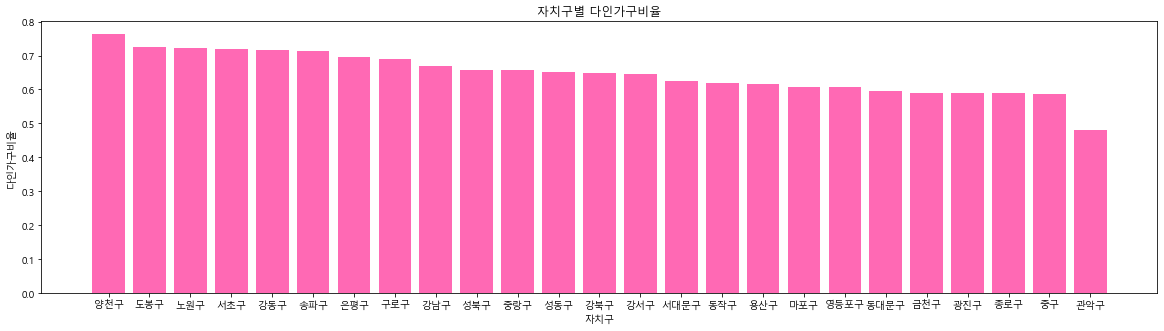

In [16]:
x = 그래프.index
y = 그래프['다인가구비율']
plt.figure(figsize = (20,5))
plt.bar(x,y, color = 'hotpink')
plt.xlabel('자치구')
plt.ylabel('다인가구비율')
plt.title('자치구별 다인가구비율')
plt.show()

- 발표 제외 데이터 분석 및 시각화

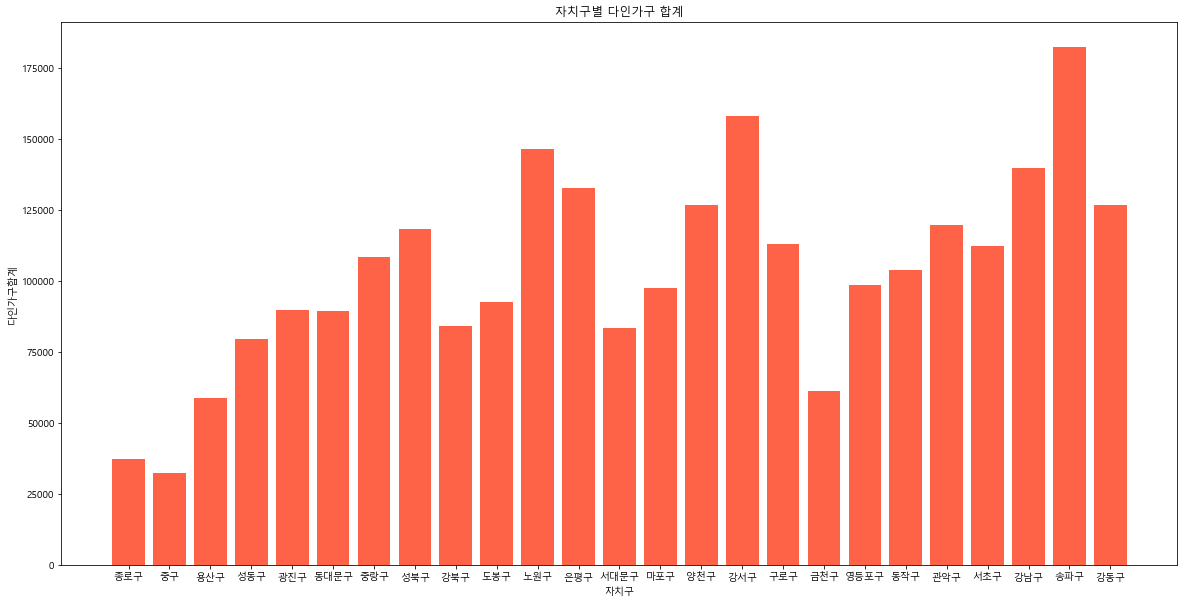

In [18]:
# 다인가구 합계 그래프 그리기 
x = 자치구소계['자치구']
y = 자치구소계['다인가구합계']
plt.figure(figsize = (20,10))
plt.bar(x,y, color = 'tomato')
plt.xlabel('자치구')
plt.ylabel('다인가구합계')
plt.title('자치구별 다인가구 합계')
plt.show()


In [19]:
#자치구별 다인가구 비교

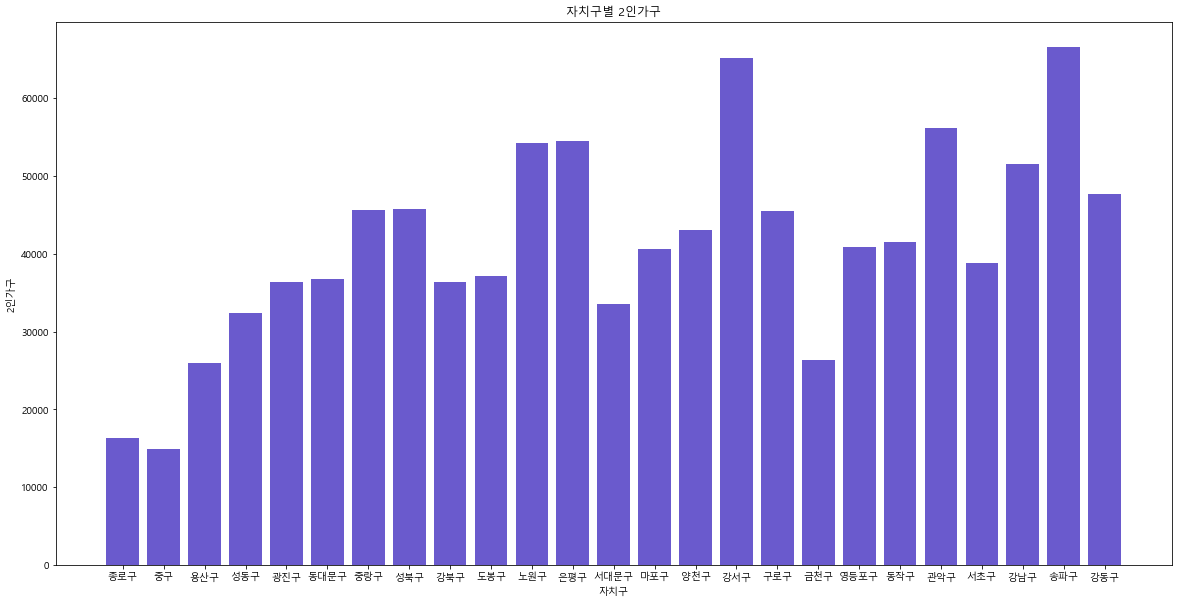

In [20]:
#2인가구 

x = 자치구소계['자치구']
y2 = 자치구소계['2인가구']
plt.figure(figsize = (20,10))
plt.bar(x,y2, color = 'slateblue')
plt.xlabel('자치구')
plt.ylabel('2인가구')
plt.title('자치구별 2인가구')
plt.show()

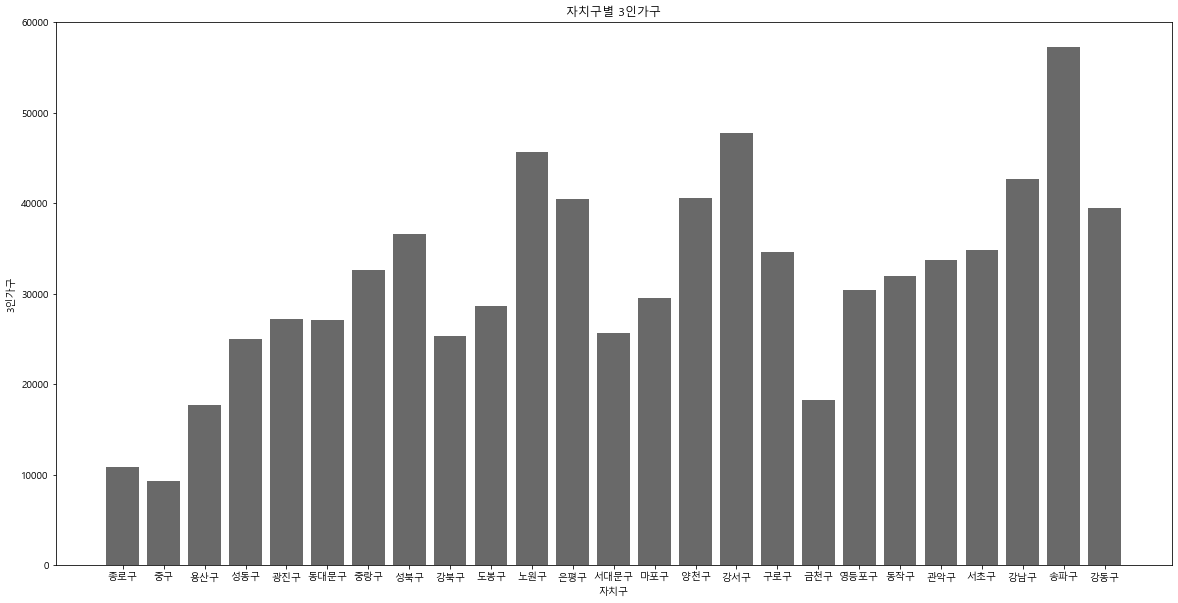

In [21]:
#3인가구

x = 자치구소계['자치구']
y3 = 자치구소계['3인가구']
plt.figure(figsize = (20,10))
plt.bar(x,y3, color = 'dimgray')
plt.xlabel('자치구')
plt.ylabel('3인가구')
plt.title('자치구별 3인가구')
plt.show()

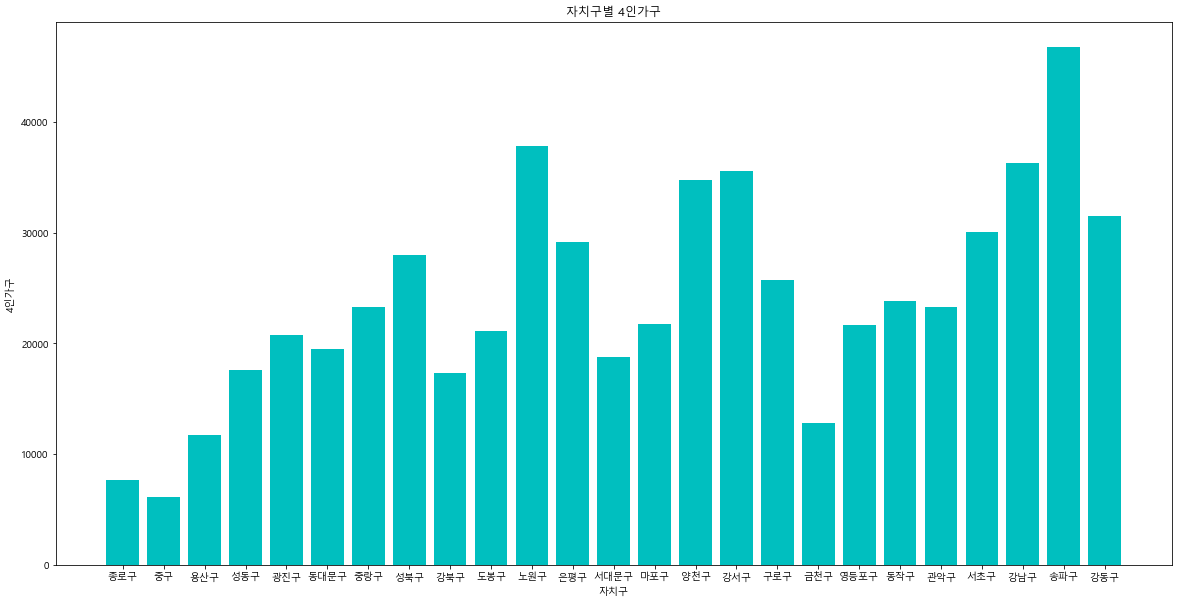

In [22]:
#4인가구

x = 자치구소계['자치구']
y4 = 자치구소계['4인가구']
plt.figure(figsize = (20,10))
plt.bar(x,y4, color = 'c')
plt.xlabel('자치구')
plt.ylabel('4인가구')
plt.title('자치구별 4인가구')
plt.show()

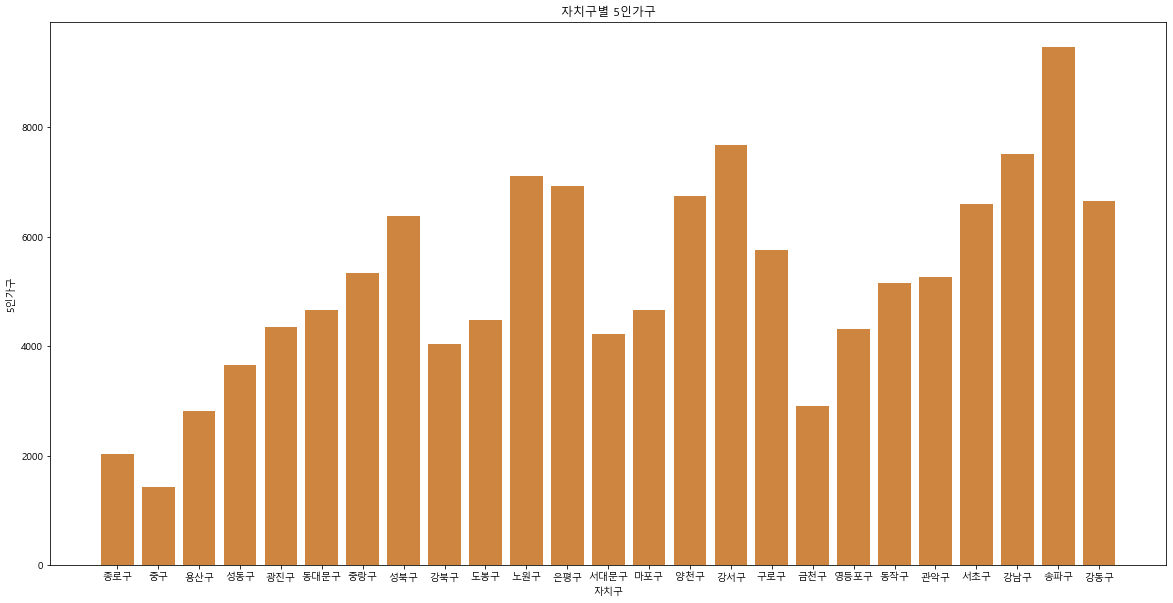

In [23]:
#5인가구

x = 자치구소계['자치구']
y5 = 자치구소계['5인가구']
plt.figure(figsize = (20,10))
plt.bar(x,y5, color = 'peru')
plt.xlabel('자치구')
plt.ylabel('5인가구')
plt.title('자치구별 5인가구')
plt.show()

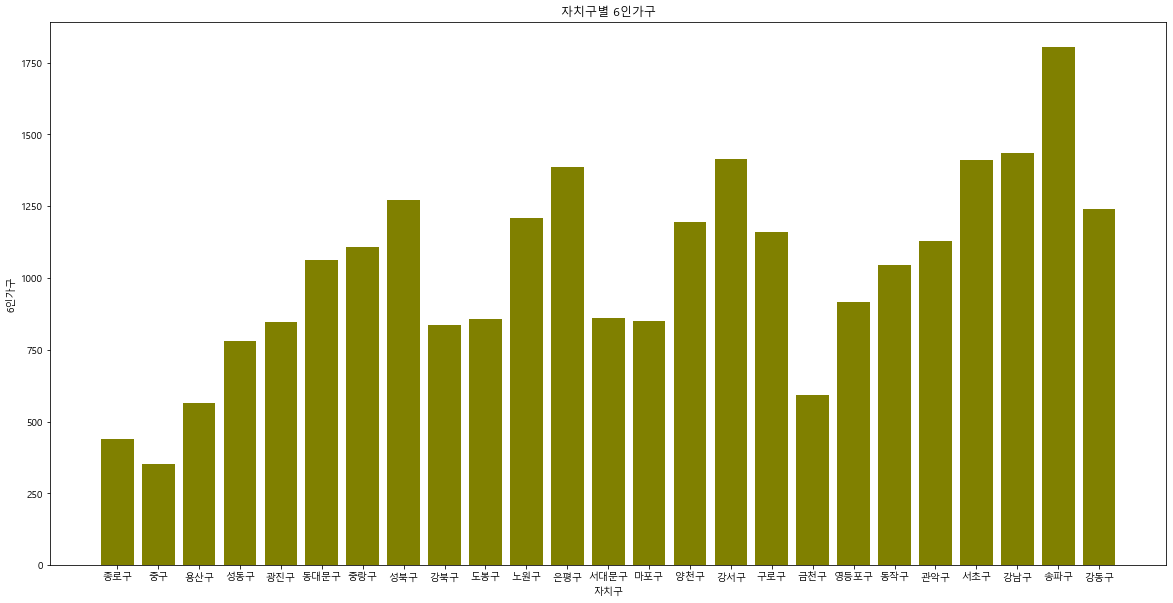

In [24]:
#6인가구

x = 자치구소계['자치구']
y6 = 자치구소계['6인가구']
plt.figure(figsize = (20,10))
plt.bar(x,y6, color = 'olive')
plt.xlabel('자치구')
plt.ylabel('6인가구')
plt.title('자치구별 6인가구')
plt.show()

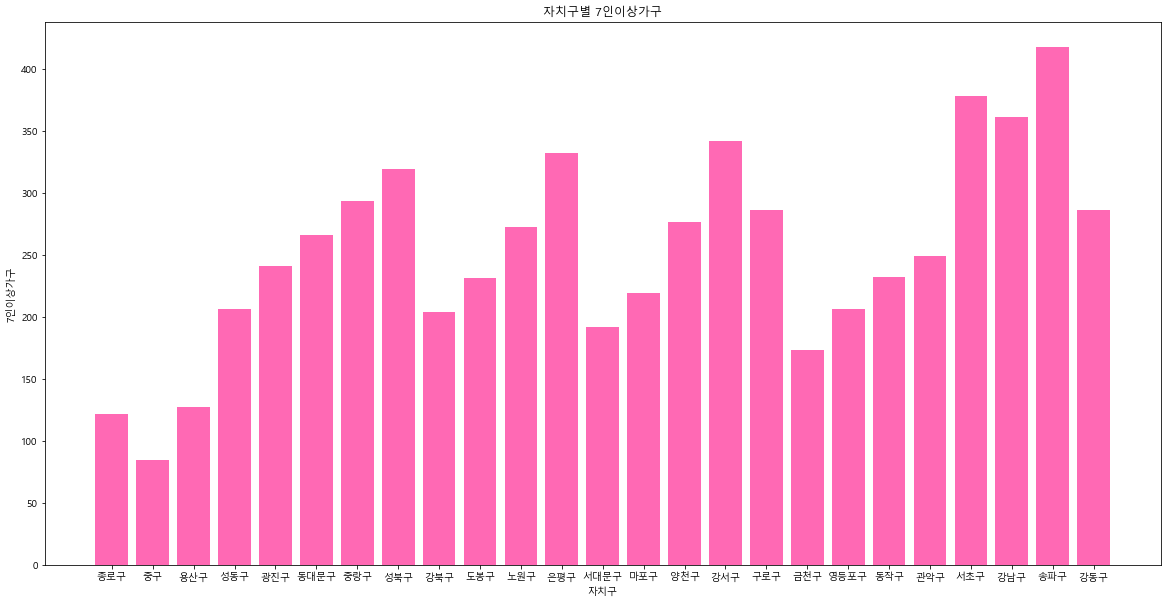

In [25]:
#7인이상가구

x = 자치구소계['자치구']
y7 = 자치구소계['7인이상가구']
plt.figure(figsize = (20,10))
plt.bar(x,y7, color = 'hotpink')
plt.xlabel('자치구')
plt.ylabel('7인이상가구')
plt.title('자치구별 7인이상가구')
plt.show()

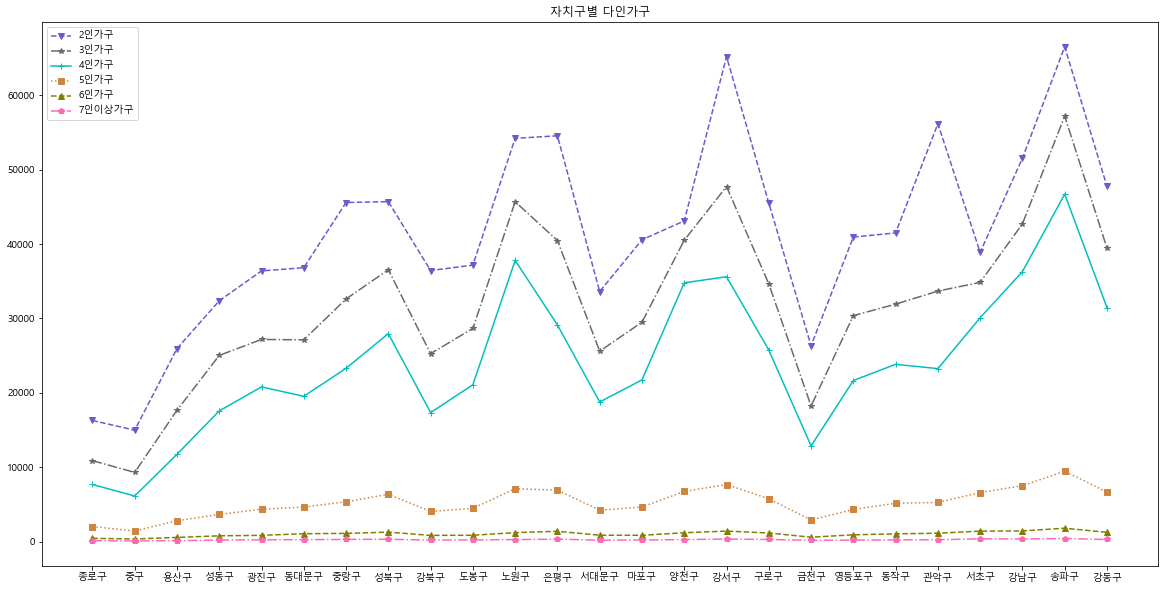

In [26]:
#한번에 비교
plt.figure(figsize = (20,10))

plt.plot(x, y2, label =  '2인가구', color = 'slateblue', linestyle = '--', marker = 'v')
plt.plot(x, y3, label =  '3인가구', color = 'dimgray', linestyle = '-.', marker = '*')
plt.plot(x, y4, label =  '4인가구', color = 'c', linestyle = '-', marker = '+')
plt.plot(x, y5, label =  '5인가구', color = 'peru', linestyle = ':', marker = 's')
plt.plot(x, y6, label =  '6인가구', color = 'olive', linestyle = '--', marker = '^')
plt.plot(x, y7, label =  '7인이상가구', color = 'hotpink', linestyle = '-.', marker = 'p')

plt.legend()
plt.title('자치구별 다인가구')
plt.grid(False)
plt.show()

In [27]:
#자치구별 비율

n = ['1인가구', '2인가구', '3인가구', '4인가구', '5인가구', '6인가구', '7인이상가구']
종로구 = []
for i in n:
    종로구.append(자치구소계.loc[0,i] / 자치구소계.loc[0,'총가구'])

중구 = []
for i in n:
    중구.append(자치구소계.loc[1,i] / 자치구소계.loc[1,'총가구'])  
    
용산구 = []
for i in n:
    용산구.append(자치구소계.loc[2,i] / 자치구소계.loc[2,'총가구'])

성동구 = []
for i in n:
    성동구.append(자치구소계.loc[3,i] / 자치구소계.loc[3,'총가구'])
    
광진구 = []
for i in n:
    광진구.append(자치구소계.loc[4,i] / 자치구소계.loc[4,'총가구'])
    
동대문구 = []
for i in n:
    동대문구.append(자치구소계.loc[5,i] / 자치구소계.loc[5,'총가구'])

중랑구 = []
for i in n:
    중랑구.append(자치구소계.loc[6,i] / 자치구소계.loc[6,'총가구'])
    
성북구 = []
for i in n:
    성북구.append(자치구소계.loc[7,i] / 자치구소계.loc[7,'총가구'])
    
강북구 = []
for i in n:
    강북구.append(자치구소계.loc[8,i] / 자치구소계.loc[8,'총가구'])
    
도봉구 = []
for i in n:
    도봉구.append(자치구소계.loc[9,i] / 자치구소계.loc[9,'총가구'])
    
노원구 = []
for i in n:
    노원구.append(자치구소계.loc[10,i] / 자치구소계.loc[10,'총가구'])
    
은평구 = []
for i in n:
    은평구.append(자치구소계.loc[11,i] / 자치구소계.loc[11,'총가구'])

서대문구 = []
for i in n:
    서대문구.append(자치구소계.loc[12,i] / 자치구소계.loc[12,'총가구'])
    
마포구 = []
for i in n:
    마포구.append(자치구소계.loc[13,i] / 자치구소계.loc[13,'총가구'])
    
양천구 = []
for i in n:
    양천구.append(자치구소계.loc[14,i] / 자치구소계.loc[14,'총가구'])
    
강서구 = []
for i in n:
    강서구.append(자치구소계.loc[15,i] / 자치구소계.loc[15,'총가구'])
    
구로구 = []
for i in n:
    구로구.append(자치구소계.loc[16,i] / 자치구소계.loc[16,'총가구'])
    
금천구 = []
for i in n:
    금천구.append(자치구소계.loc[17,i] / 자치구소계.loc[17,'총가구'])
    
영등포구 = []
for i in n:
    영등포구.append(자치구소계.loc[18,i] / 자치구소계.loc[18,'총가구'])
    
동작구 = []
for i in n:
    동작구.append(자치구소계.loc[19,i] / 자치구소계.loc[19,'총가구'])
    
관악구 = []
for i in n:
    관악구.append(자치구소계.loc[20,i] / 자치구소계.loc[20,'총가구'])
    
서초구 = []
for i in n:
    서초구.append(자치구소계.loc[21,i] / 자치구소계.loc[21,'총가구'])
    
강남구 = []
for i in n:
    강남구.append(자치구소계.loc[22,i] / 자치구소계.loc[22,'총가구'])
    
송파구 = []
for i in n:
    송파구.append(자치구소계.loc[23,i] / 자치구소계.loc[23,'총가구'])
    
강동구 = []
for i in n:
    강동구.append(자치구소계.loc[24,i] / 자치구소계.loc[24,'총가구'])

C:\Users\suji\AppData\Local\Temp/ipykernel_2808/2307450204.py:19: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(용산구, labels=n, autopct='%.1f%%', colors=colors)


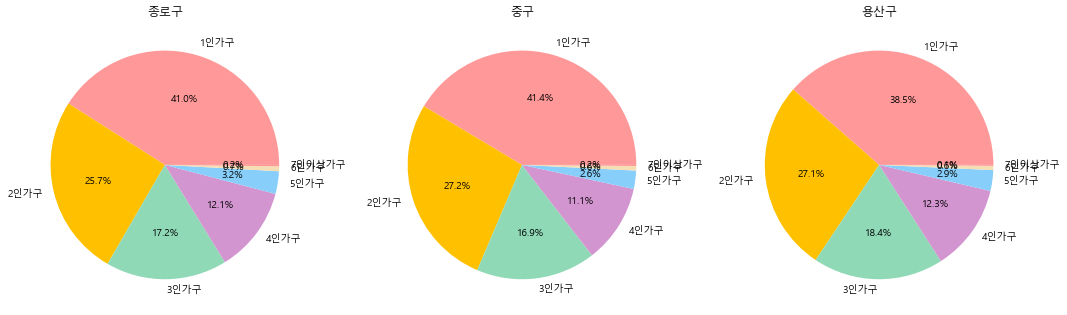

In [28]:
#3개 구씩 그리기

plt.figure(figsize = (15,15))

plt.subplot(131)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(종로구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('종로구')


plt.subplot(132)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(중구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('중구')


plt.subplot(133)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(용산구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('용산구')


plt.tight_layout()
plt.show()

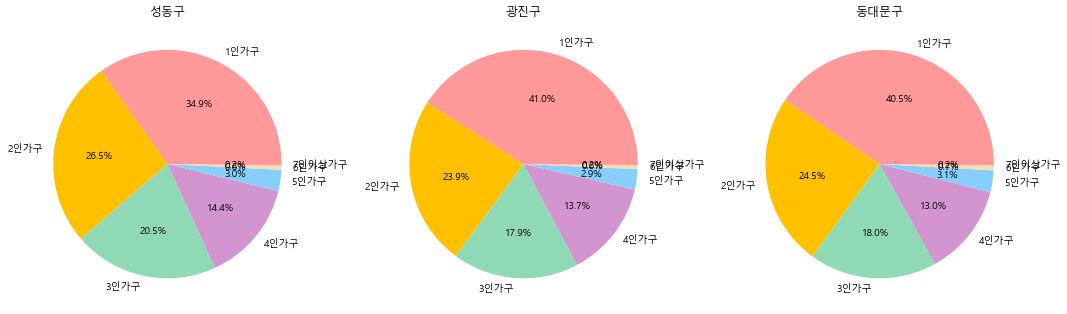

In [29]:
plt.figure(figsize = (15,15))

plt.subplot(131)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(성동구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('성동구')

plt.subplot(132)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(광진구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('광진구')

plt.subplot(133)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(동대문구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('동대문구')

plt.tight_layout()
plt.show()

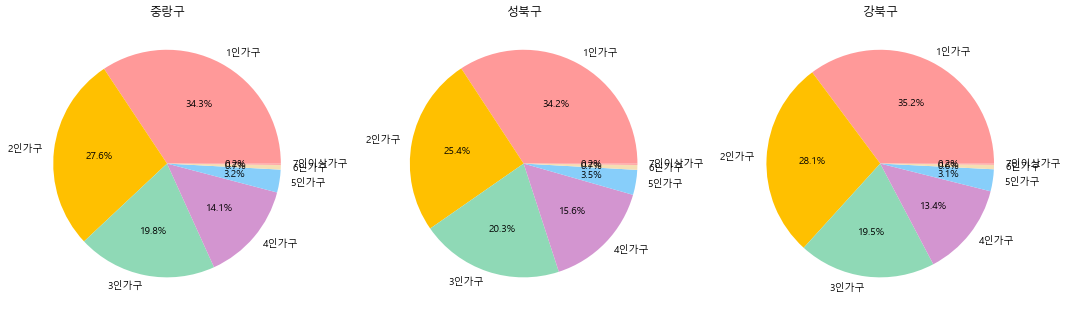

In [30]:
plt.figure(figsize = (15,15))

plt.subplot(131)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(중랑구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('중랑구')

plt.subplot(132)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(성북구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('성북구')

plt.subplot(133)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(강북구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('강북구')

plt.tight_layout()
plt.show()

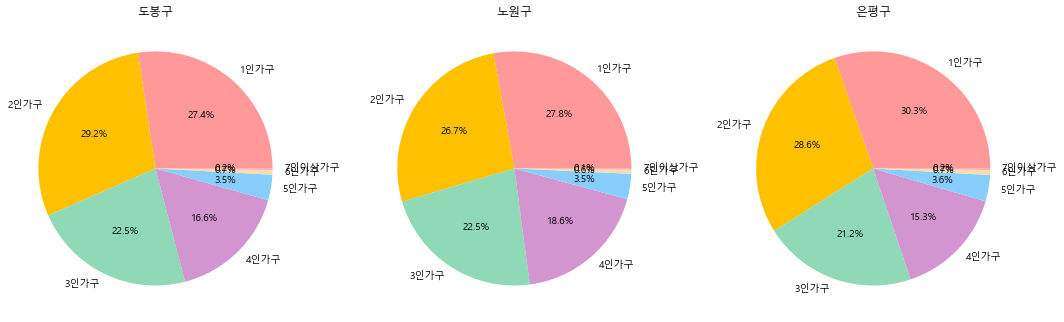

In [31]:
plt.figure(figsize = (15,15))

plt.subplot(131)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(도봉구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('도봉구')

plt.subplot(132)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(노원구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('노원구')

plt.subplot(133)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(은평구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('은평구')

plt.tight_layout()
plt.show()

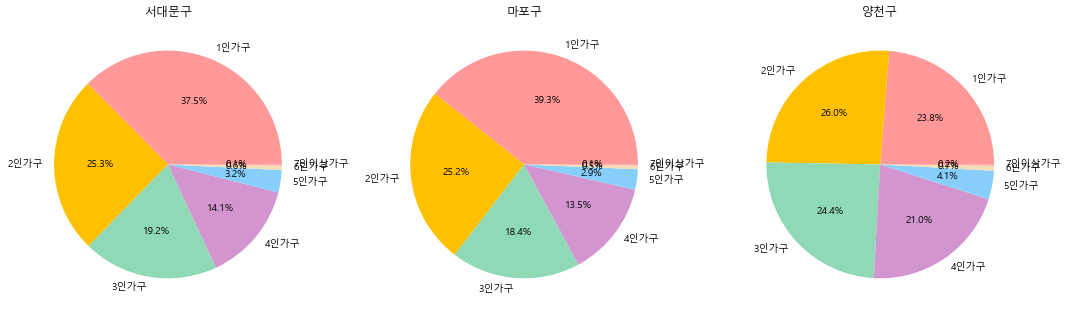

In [32]:
plt.figure(figsize = (15,15))

plt.subplot(131)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(서대문구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('서대문구')

plt.subplot(132)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(마포구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('마포구')

plt.subplot(133)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(양천구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('양천구')

plt.tight_layout()
plt.show()

C:\Users\suji\AppData\Local\Temp/ipykernel_2808/3693171179.py:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(구로구, labels=n, autopct='%.1f%%', colors=colors)


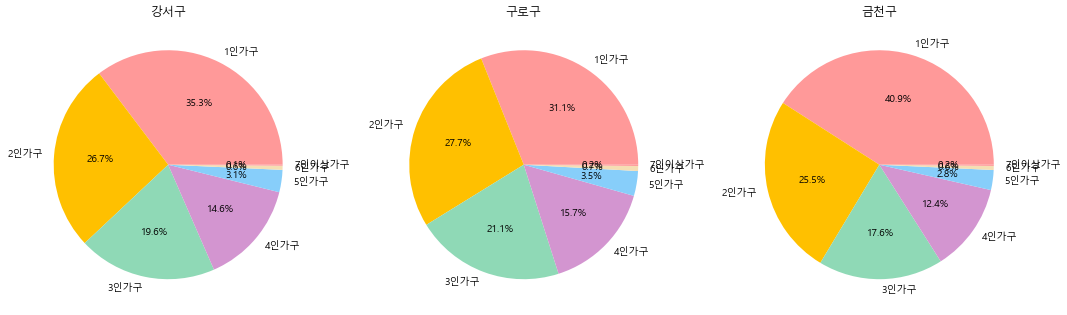

In [33]:
plt.figure(figsize = (15,15))

plt.subplot(131)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(강서구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('강서구')

plt.subplot(132)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(구로구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('구로구')

plt.subplot(133)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(금천구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('금천구')

plt.tight_layout()
plt.show()

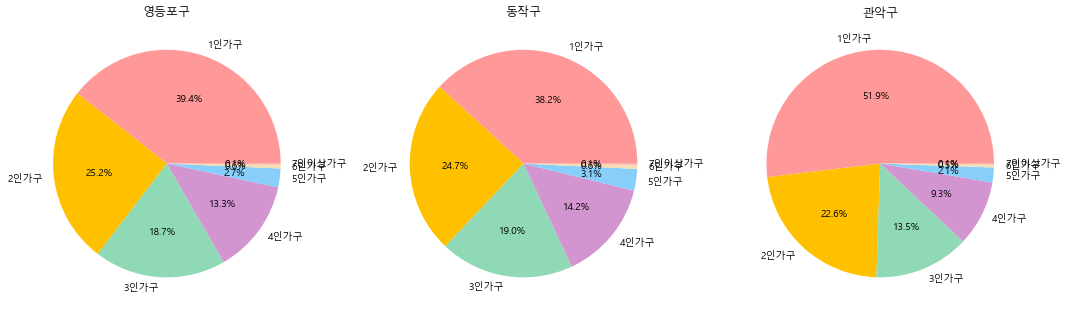

In [34]:
plt.figure(figsize = (15, 15))

plt.subplot(131)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(영등포구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('영등포구')


plt.subplot(132)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(동작구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('동작구')


plt.subplot(133)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(관악구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('관악구')

plt.tight_layout()
plt.show()

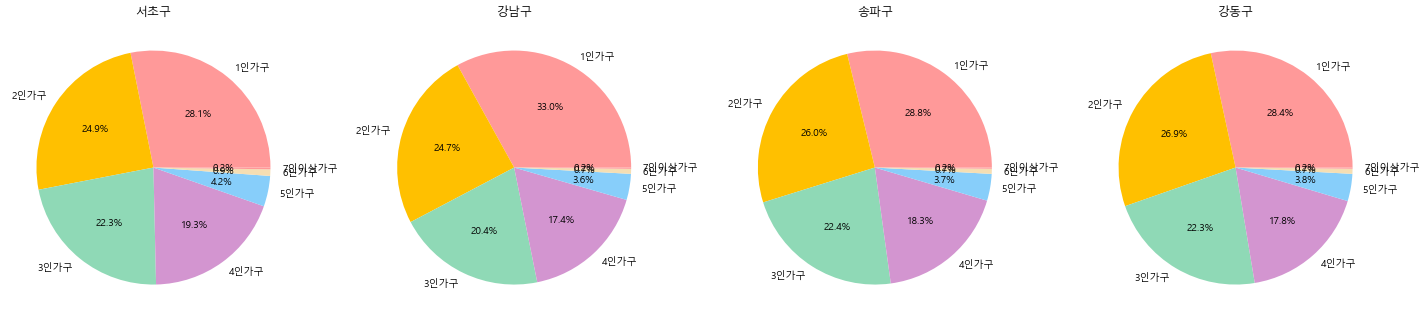

In [35]:
plt.figure(figsize = (20, 20))

plt.subplot(141)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(서초구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('서초구')


plt.subplot(142)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(강남구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('강남구')


plt.subplot(143)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(송파구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('송파구')


plt.subplot(144)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue', 'wheat']
plt.pie(강동구, labels=n, autopct='%.1f%%', colors=colors)
plt.title('강동구')

plt.tight_layout()
plt.show()

In [36]:
#자치구별 학생 교육 관련 학원 데이터 

df2 = pd.read_csv('data/서울특별시 학원 교습소정보.csv')
df2['행정구역명'].value_counts()

강남구     3545
양천구     2156
송파구     1946
서초구     1894
노원구     1452
강서구     1321
강동구     1273
마포구     1122
은평구     1082
성북구      958
동작구      949
영등포구     825
관악구      789
광진구      785
구로구      767
서대문구     730
동대문구     651
도봉구      620
중랑구      568
성동구      546
강북구      442
금천구      370
종로구      324
용산구      267
중구       155
Name: 행정구역명, dtype: int64

In [37]:
df2['분야명'].value_counts()

입시.검정 및 보습    13582
예능(대)          6822
국제화            1228
독서실             875
직업기술            862
기타(대)           828
기예(대)           675
종합(대)           448
인문사회(대)         275
정보               10
특수교육(대)           1
Name: 분야명, dtype: int64

In [38]:
#10대 교육과 관련된 학원만 뽑기

교육 = ['입시.검정 및 보습', '국제화', '독서실', '종합(대)']
c = df2['분야명'].isin(교육)
학원 = df2[c]
학원['분야명'].value_counts()

입시.검정 및 보습    13582
국제화            1228
독서실             875
종합(대)           448
Name: 분야명, dtype: int64

In [39]:
e = 학원['행정구역명'].value_counts()
e

강남구     2410
양천구     1618
서초구     1172
송파구     1171
노원구      983
강서구      850
강동구      801
은평구      708
성북구      634
마포구      588
동작구      562
광진구      486
서대문구     464
구로구      455
관악구      444
영등포구     431
도봉구      401
동대문구     396
중랑구      339
성동구      311
강북구      260
금천구      206
종로구      175
용산구      154
중구        83
Name: 행정구역명, dtype: int64

Text(0, 0.5, '학원 수')

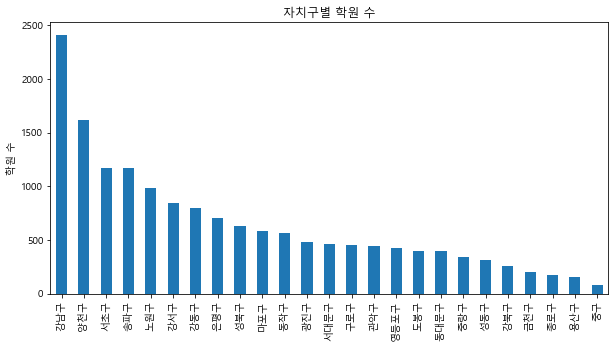

In [40]:
plt.figure(figsize=(10,5))
e.plot(kind='bar')
plt.title('자치구별 학원 수')
plt.ylabel('학원 수')

In [ ]:
#강남구, 양천구, 서초구, 송파구, 노원구, 강서구, 강동구 , 은평구 ~